# LOGISTIC REGRESSION MODEL

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# checking the percentage unique
# 1.0 = 100% unique

for col in data.columns:
    print(" col_name : ", col, " unique percentage : ", len(data[col].unique())/len(data))

 col_name :  RowNumber  unique percentage :  1.0
 col_name :  CustomerId  unique percentage :  1.0
 col_name :  Surname  unique percentage :  0.2932
 col_name :  CreditScore  unique percentage :  0.046
 col_name :  Geography  unique percentage :  0.0003
 col_name :  Gender  unique percentage :  0.0002
 col_name :  Age  unique percentage :  0.007
 col_name :  Tenure  unique percentage :  0.0011
 col_name :  Balance  unique percentage :  0.6382
 col_name :  NumOfProducts  unique percentage :  0.0004
 col_name :  HasCrCard  unique percentage :  0.0002
 col_name :  IsActiveMember  unique percentage :  0.0002
 col_name :  EstimatedSalary  unique percentage :  0.9999
 col_name :  Exited  unique percentage :  0.0002


In [5]:
# deleting RowNumber, CustomerId and Surname

data = data.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Label encode the Object Datatypes
from sklearn.preprocessing import LabelEncoder

d_types = dict(data.dtypes)

for name, type_ in d_types.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        data[name] = Le.fit_transform(data[name])

In [7]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# one hot encode geography
# (optional)

from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
encodings = onehotencoder.fit_transform(data['Geography'].values.reshape(-1,1)).toarray()

# values = dict(data["Geography"].value_counts())
values = data["Geography"].unique()

for val in values:
    data["Geography_" + str(val)] = encodings[:,val]
    
data = data.drop(["Geography"], axis = 1)

data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_2,Geography_1
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


In [9]:
remaining_columns = list(data.columns)
remaining_columns.remove("Exited")

In [10]:
# Feature and Target vector

X = data[remaining_columns].values
Y = data['Exited'].values.astype(np.uint8)

In [11]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
X = Scaler.fit_transform(X)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV

model = LogisticRegression()
rfecv = RFECV(model, step=1, min_features_to_select=4, n_jobs=-1)
rfecv.fit(X, Y)

RFECV(estimator=LogisticRegression(), min_features_to_select=4, n_jobs=-1)

In [13]:
selected_features = np.where(rfecv.support_)[0]
X = X[:,selected_features]

In [15]:
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=5)

test_scores = []
for train_idx, test_idx in k_fold.split(X):
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]
    
    Xtest = X[test_idx]
    Ytest = Y[test_idx]
    
    model = LogisticRegression()
    model.fit(Xtrain, Ytrain)
    
    test_scores.append(model.score(Xtest, Ytest))

<function matplotlib.pyplot.show(close=None, block=None)>

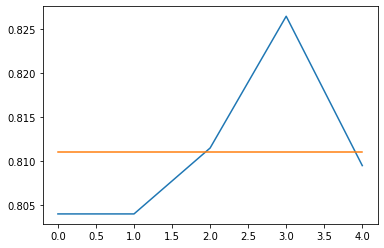

In [17]:
import matplotlib.pyplot as plt

plt.plot(test_scores)
plt.plot([np.mean(test_scores)]*len(test_scores))
plt.show

In [18]:
print(" Cross validation score : ", np.mean(test_scores))

 Cross validation score :  0.8111
